In [1]:
#HW3-Problem 2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('F:\CERES_EBAF-TOA_200003-201701.nc')
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [3]:
#2.1 计算短波辐射，长波辐射，太阳辐射 TOA 二维图，将这三个相加，验证他们等于TOA静通量
plt_data=[ds.toa_sw_all_mon.mean(dim='time'),
          ds.toa_lw_all_mon.mean(dim='time'),
          ds.toa_net_all_mon.mean(dim='time'),
          ds.solar_mon.mean(dim='time'),]
labels=['TOA shortwave radiation','TOA longwave radiation',
       'TOA net radiation','Solar radiation']

Text(0.5, 1.0, 'Verification')

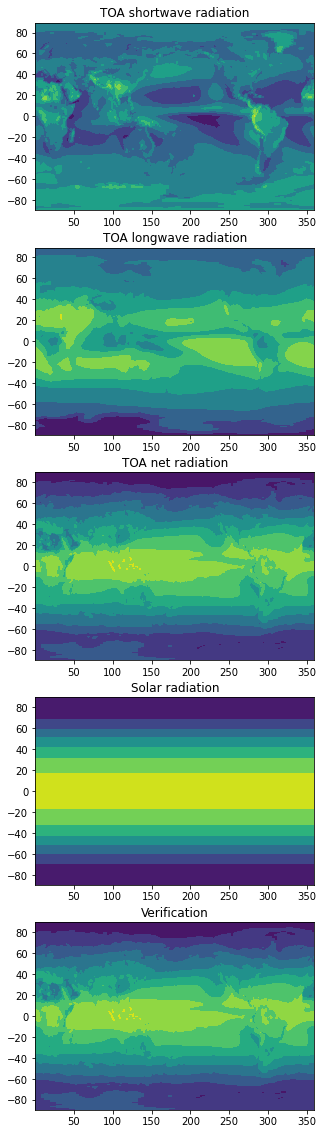

In [4]:
ig,axs=plt.subplots(5,1,figsize=(5,20))
lon=plt_data[0].lon
lat=plt_data[0].lat

for data,ax,label in zip(plt_data[:4],axs[:4],labels[:4]):
    ax.contourf(lon,lat,data,)
    ax.set_title(label)
   
axs[4].contourf(lon,lat,plt_data[3]-(plt_data[0]+plt_data[1]))
axs[4].set_title('Verification')


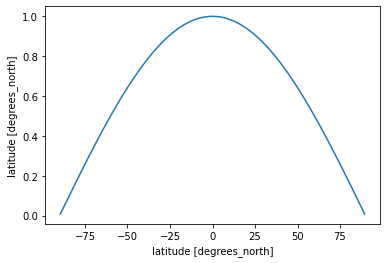

In [5]:
#2.2
weights=np.cos(np.deg2rad(ds.lat))
weights.plot()

In [6]:
data_list=[ds.solar_mon,ds.toa_sw_all_mon,ds.toa_lw_all_mon]
list(map(lambda data: data.sel(time=slice('2006','2016')).weighted(weights).mean(), data_list))

[<xarray.DataArray 'solar_mon' ()>
 array(340.29804625),
 <xarray.DataArray 'toa_sw_all_mon' ()>
 array(99.00474541),
 <xarray.DataArray 'toa_lw_all_mon' ()>
 array(240.26727502)]

In [7]:
#2.3
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter




Text(0.5, 0, 'Latitude')

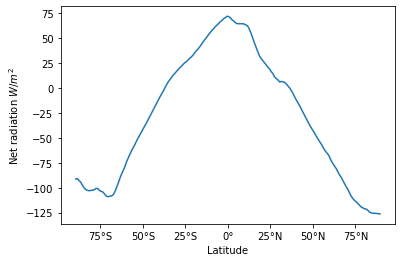

In [9]:
fig,ax=plt.subplots()
ax.plot(ds.lat,ds.toa_net_all_mon.weighted(weights).mean(dim=['time','lon']))
ax.set_ylabel('Net radiation $W/m^2$')
ax.xaxis.set_major_formatter(LatitudeFormatter())
ax.set_xlabel('Latitude')


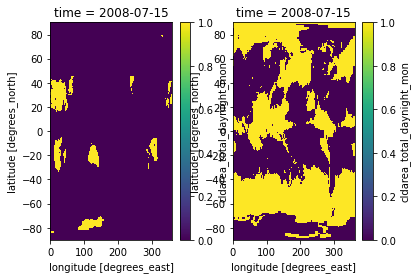

In [10]:
#2.4
cloud_frac=ds.cldarea_total_daynight_mon
low_cloud=cloud_frac.where(cloud_frac<= 25)
high_cloud=cloud_frac.where(cloud_frac>=75)
low_cloud_mask=xr.where(np.isnan(low_cloud)==False,1,0)
high_cloud_mask=xr.where(np.isnan(high_cloud)==False,1,0)
plt.subplot(1,2,1)
low_cloud_mask[100].plot()
plt.subplot(1,2,2)
high_cloud_mask[100].plot()


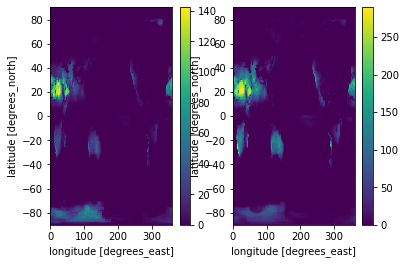

In [11]:
low_cloud_sw=ds.toa_sw_all_mon*low_cloud_mask
low_cloud_lw=ds.toa_lw_all_mon*low_cloud_mask
plt.subplot(1,2,1)
low_cloud_sw.mean(dim='time').plot()
plt.subplot(1,2,2)
low_cloud_lw.mean(dim='time').plot()


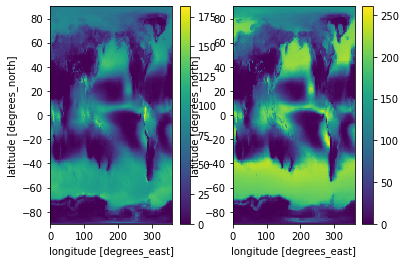

In [12]:
high_cloud_sw=ds.toa_sw_all_mon*high_cloud_mask
high_cloud_lw=ds.toa_lw_all_mon*high_cloud_mask

plt.subplot(1,2,1)
high_cloud_sw.mean(dim='time').plot()
plt.subplot(1,2,2)
high_cloud_lw.mean(dim='time').plot()


In [13]:
#2.5
print('Low cloud  shortwave radiation %.2f W/m^2'%low_cloud_sw.weighted(weights).mean())
print('Low cloud  longwave radiation %.2f W/m^2'%low_cloud_lw.weighted(weights).mean())
print('High cloud shortwave radiation %.2f W/m^2'%high_cloud_sw.weighted(weights).mean())
print('High cloud longwave radiation %.2f W/m^2'%high_cloud_lw.weighted(weights).mean())


Low cloud  shortwave radiation 3.97 W/m^2
Low cloud  longwave radiation 12.19 W/m^2
High cloud shortwave radiation 48.82 W/m^2
High cloud longwave radiation 96.13 W/m^2
